# Presentación Final

In [13]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mexico_covid19.csv')

df.head(2)

,id,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,ORIGEN,...,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,DIABETES,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD
0,9269,12/04/20,25,25,2,0,25,Sinaloa,SL,2,...,97,2,74,1,1,2,2,1,2,1
1,33333,12/04/20,14,14,2,0,14,Jalisco,JC,1,...,2,2,71,1,1,2,2,1,2,1


In [3]:
df.shape

(261825, 25)

In [4]:
df.columns

Index(['id', 'FECHA_ARCHIVO', 'ENTIDAD_UM', 'ENTIDAD_RES', 'RESULTADO',
       'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT', 'ORIGEN', 'SEXO',
       'ENTIDAD_NAC', 'MUNICIPIO_RES', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'DIABETES', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD'],
      dtype='object')

# Limpieza de Datos

## ¿Qué estado de la frontera tiene más casos COVID19?

In [5]:
#pd.pivot_table(df,
        #       index = ['ENTIDAD','SEXO','RESULTADO'],
        #       values = ['EDAD'])

estados_Norte = ['Nuevo Leon','Coahuila','Sonora','Tamaulipas','Chihuahua','Baja California']

df_1 = df[df.ENTIDAD.str.contains('|'.join(estados_Norte))]
df_1.ENTIDAD.unique()

array(['Chihuahua', 'Nuevo Leon', 'Coahuila', 'Tamaulipas',
       'Baja California', 'Baja California Sur', 'Sonora'], dtype=object)

In [6]:
df_1.shape

(48386, 25)

In [7]:
df_1.head(3)

,id,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,ORIGEN,...,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,DIABETES,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD
2,35483,12/04/20,8,8,1,0,8,Chihuahua,CH,1,...,2,1,50,1,2,2,2,2,2,2
5,5019,12/04/20,19,19,2,0,19,Nuevo Leon,NL,1,...,97,2,67,1,2,2,2,1,2,1
8,4265,12/04/20,19,19,2,0,19,Nuevo Leon,NL,2,...,97,2,30,1,2,2,2,2,2,2


# Graficas

In [31]:
casos = pd.pivot_table(df_1,
                      columns = ['ENTIDAD'],
                      aggfunc = 'size')
EstadosF = ['Baja California','Baja California Sur','Chihuahua',
            'Coahuila','Nuevo Leon','Sonora','Tamaulipas']
casos

ENTIDAD
Baja California         8871
Baja California Sur     2298
Chihuahua               3881
Coahuila                7548
Nuevo Leon             12791
Sonora                  5301
Tamaulipas              7696
dtype: int64

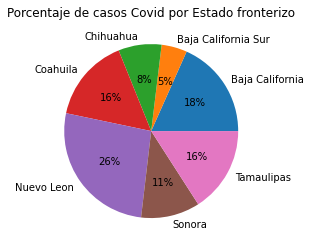

In [40]:
piehcart = plt.pie(casos, 
                   labels = EstadosF,
                   autopct = '%.0F%%')

plt.title('Porcentaje de casos Covid por Estado fronterizo')
plt.show()